<a href="https://colab.research.google.com/github/cswcjt/Dacon_Bike/blob/main/bike_holiday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

import itertools
import numpy as np
import pandas as pd
import os
import holidays

base_path = "/content/drive/MyDrive/fastcamp/datas/bike/"
train = pd.read_csv(base_path + "train.csv")
submission = pd.read_csv(base_path + "sample_submission.csv")
save_path = "/content/drive/MyDrive/fastcamp/datas/"

train['일시'] = pd.to_datetime(train['일시'], format='%Y%m%d')
regions = ['광진구', '동대문구', '성동구', '중랑구']

train

,일시,광진구,동대문구,성동구,중랑구
0,2018-01-01,0.592,0.368,0.580,0.162
1,2018-01-02,0.840,0.614,1.034,0.260
2,2018-01-03,0.828,0.576,0.952,0.288
3,2018-01-04,0.792,0.542,0.914,0.292
4,2018-01-05,0.818,0.602,0.994,0.308
...,...,...,...,...,...
1456,2021-12-27,3.830,3.416,2.908,2.350
1457,2021-12-28,4.510,3.890,3.714,2.700
1458,2021-12-29,4.490,3.524,3.660,2.524
1459,2021-12-30,4.444,3.574,3.530,2.506


In [3]:
def predict(train, column):
    model = Prophet()
    df = pd.DataFrame()
    df['ds'] = train['일시']
    df['y'] = train[column]
    model.fit(df)
    future = model.make_future_dataframe(periods=334, freq='D')
    forecast = model.predict(future)
    return forecast.loc[1461:, 'yhat'].values

for region in regions:
    submission[region] = predict(train, region)
   
submission

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpil4vyjyi/_bq8grog.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpil4vyjyi/yuywv59n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30790', 'data', 'file=/tmp/tmpil4vyjyi/_bq8grog.json', 'init=/tmp/tmpil4vyjyi/yuywv59n.json', 'output', 'file=/tmp/tmpil4vyjyi/prophet_modelo6sju6ub/prophet_model-20221204151746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpil4

,일시,광진구,동대문구,성동구,중랑구
0,20220101,5.110203,4.662176,3.896330,3.303345
1,20220102,4.821968,4.401556,3.769503,3.082229
2,20220103,5.121813,5.151970,4.121842,3.323606
3,20220104,5.240828,5.303184,4.215095,3.448420
4,20220105,5.470450,5.442060,4.370883,3.569264
...,...,...,...,...,...
329,20221126,8.962125,8.007408,6.372682,5.352272
330,20221127,8.575407,7.668120,6.167637,5.070159
331,20221128,8.775184,8.337838,6.441324,5.250297
332,20221129,8.792578,8.406381,6.455402,5.313642


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

_, ax = plt.subplots(4, 1, figsize=(20, 28))
cols = ['광진구', '동대문구', '성동구', '중랑구']
for i in range(4):
    sns.lineplot(train['일시'], train[cols[i]], ci=None, ax=ax[i])
plt.show()

In [4]:
model = Prophet()
df = pd.DataFrame()
df['ds'] = train['일시']
df['y'] = train['동대문구']
model.fit(df)

df_cv = cross_validation(model, horizon = '365 days', parallel="processes")
df_cv

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpil4vyjyi/tcck5upg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpil4vyjyi/cxddsu07.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86845', 'data', 'file=/tmp/tmpil4vyjyi/tcck5upg.json', 'init=/tmp/tmpil4vyjyi/cxddsu07.json', 'output', 'file=/tmp/tmpil4vyjyi/prophet_modelllwra7q6/prophet_model-20221204151800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 1 forecasts with cutoffs between 2020-12-31 00:00:00 and 2020-12-31 00:00:00
INFO:prophet:Applying in parallel with <concur

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-01-01,3.267902,1.897759,4.595428,1.650,2020-12-31
1,2021-01-02,2.956458,1.694773,4.319787,1.906,2020-12-31
2,2021-01-03,2.647117,1.392188,3.907045,1.854,2020-12-31
3,2021-01-04,3.268249,2.003272,4.554993,2.716,2020-12-31
4,2021-01-05,3.534857,2.200371,4.829497,2.372,2020-12-31
...,...,...,...,...,...,...
360,2021-12-27,4.011642,2.627993,5.449925,3.416,2020-12-31
361,2021-12-28,4.244113,2.907934,5.694019,3.890,2020-12-31
362,2021-12-29,4.057092,2.684748,5.498766,3.524,2020-12-31
363,2021-12-30,4.123294,2.844580,5.528920,3.574,2020-12-31


In [5]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,2.169825,1.473033,1.270338,0.900799,0.581168,0.496966,0.555556
1,37 days,2.097221,1.448178,1.227120,0.874093,0.520688,0.479226,0.583333
2,38 days,2.067040,1.437720,1.201559,0.860117,0.478369,0.468526,0.583333
3,39 days,2.059232,1.435003,1.195913,0.853980,0.478369,0.463944,0.583333
4,40 days,2.052473,1.432646,1.187471,0.850338,0.478369,0.460754,0.583333
...,...,...,...,...,...,...,...,...
325,361 days,1.887331,1.373802,1.105740,0.320595,0.164383,0.260079,0.611111
326,362 days,1.887715,1.373941,1.106297,0.321496,0.164383,0.260820,0.611111
327,363 days,1.894806,1.376520,1.116382,0.324870,0.164383,0.263886,0.611111
328,364 days,1.851602,1.360736,1.093787,0.323435,0.154045,0.261493,0.611111


/usr/local/lib/python3.8/dist-packages/prophet/plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


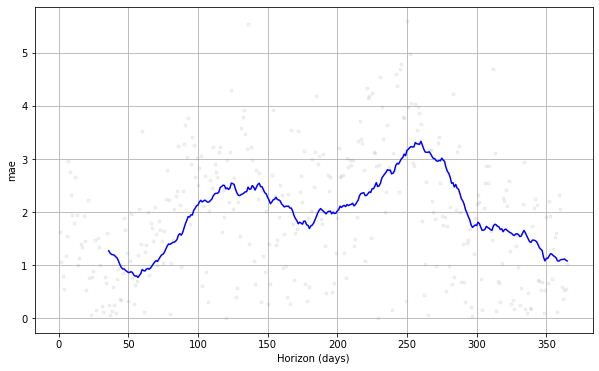

In [6]:
fig = plot_cross_validation_metric(df_cv, metric='mae')

In [7]:
"""
Hyper-parameter Tuning with Prophet
Tutorial
"""

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.5],
    'seasonality_prior_scale': [0.01, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
maes = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    model = Prophet(**params)
    df = pd.DataFrame()
    df['ds'] = train['일시']
    df['y'] = train['광진구']
    model.fit(df)  # Fit model with given params
    df_cv = cross_validation(model, horizon='365 days', parallel="processes")
    df_p = performance_metrics(df_cv)
    maes.append(df_p['mae'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = maes
tuning_results

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpil4vyjyi/z_182hnj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpil4vyjyi/e65s7dcx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60969', 'data', 'file=/tmp/tmpil4vyjyi/z_182hnj.json', 'init=/tmp/tmpil4vyjyi/e65s7dcx.json', 'output', 'file=/tmp/tmpil4vyjyi/prophet_modelr_uxi00a/prophet_model-20221204151810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
15:18:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
ERROR:cmdstanpy:Chain [1] error: error duri

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mae
0,0.001,0.01,additive,3.391536
1,0.001,0.01,multiplicative,4.931583
2,0.001,10.00,additive,2.328944
3,0.001,10.00,multiplicative,1.165524
4,0.500,0.01,additive,1.840568
5,0.500,0.01,multiplicative,2.208075
6,0.500,10.00,additive,1.040603
7,0.500,10.00,multiplicative,1.059634


In [9]:
tuning_results = tuning_results.sort_values(by=['mae']).reset_index(drop=True)
tuning_results.iloc[0, :-1].to_dict()
# final_param = tuning_results.iloc[0, :-1].to_dict()

{'changepoint_prior_scale': 0.5,
 'seasonality_prior_scale': 10.0,
 'seasonality_mode': 'additive'}

In [10]:
forecast.loc[1461:, ['ds', 'yhat']]

NameError: ignored

In [ ]:
regions

['광진구', '동대문구', '성동구', '중랑구']

In [ ]:
## Final Code is here!

from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

import itertools
import numpy as np
import pandas as pd
import os
import holidays

base_path = '/content/drive/MyDrive/dacon/bike/'

train = pd.read_csv(base_path + 'data/train.csv')
submission = pd.read_csv(base_path + 'data/sample_submission.csv')

train['일시'] = pd.to_datetime(train['일시'], format='%Y%m%d')
regions = ['광진구', '동대문구', '성동구', '중랑구']

In [ ]:
def predict(train, column):
    """
    Basic prediction model
    """
    df = pd.DataFrame()
    df['ds'] = train['일시']
    df['y'] = train[column]
    model = Prophet().fit(df)
    future = model.make_future_dataframe(periods=334, freq='D')
    forecast = model.predict(future)
    return forecast.loc[1461:, 'yhat'].values

In [ ]:
def predict2(train: pd.DataFrame, region: str, param_grid: dict):
    """
    Upgraded prediction model with hyper-parameter tuning
    """
    # Make time series dataframe for each region
    df = pd.DataFrame()
    df['ds'] = train['일시']
    df['y'] = train[region]

    # Generate all combinations of parameters
    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    maes = []  # Store the RMSEs for each params here

    # Use cross validation to evaluate all parameters
    for params in all_params:
        model = Prophet(**params)
        model.fit(df)  # Fit model with given params
        df_cv = cross_validation(model, horizon='365 days', parallel="processes")
        df_p = performance_metrics(df_cv)
        maes.append(df_p['mae'].values[0])

    # Find the best parameters
    tuning_results = pd.DataFrame(all_params)
    tuning_results['mae'] = maes

    # Sorted by rmes values
    tuning_results = tuning_results.sort_values(by=['mae'])

    # Pick the optimized(having minimum rmse value) hyper-parameter combination
    final_params = tuning_results.iloc[0, :-1].to_dict()

    # Train the final model with optimized params
    m = Prophet(**final_params).fit(df)
    future = m.make_future_dataframe(periods=334, freq='D')
    forecast = m.predict(future)
    
    # Make the predict column for submission
    return final_params, forecast.loc[1461:, 'yhat'].values

In [ ]:
import holidays

holiday = pd.DataFrame([])
for date, name in sorted(holidays.KR(years=[2018,2019,2020, 2021]).items()):
    holiday = holiday.append(pd.DataFrame({'ds': date, 'holiday': "KR-Holidays"}, index=[0]), ignore_index=True)
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')
holiday

,ds,holiday
0,2018-01-01,KR-Holidays
1,2018-02-15,KR-Holidays
2,2018-02-16,KR-Holidays
3,2018-02-17,KR-Holidays
4,2018-03-01,KR-Holidays
...,...,...
67,2021-10-03,KR-Holidays
68,2021-10-04,KR-Holidays
69,2021-10-09,KR-Holidays
70,2021-10-11,KR-Holidays


In [ ]:
final_params = []
# Set the candidates of hyper-parameters
param_grid = {
    'holidays' : [holiday],
    'changepoint_prior_scale': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
}
for region in regions:
    temp, submission[region] = predict2(train, region, param_grid)
    final_params.append(temp)

In [ ]:
# Print hyper-parameters after tuning
for region, params in zip(regions, final_params):
    print(f"--------------- Hyper-parameters of {region} ---------------")
    print('changepoint_prior_scale : ', params['changepoint_prior_scale'])
    print('seasonality_prior_scale : ', params['seasonality_prior_scale'])
    print('seasonality_mode        : ', params['seasonality_mode'])

# Check submission file name and define file name
if 'submission_bike.csv' in os.listdir(save_path):
    count = 0
    for name in os.listdir(save_path):
        if 'submission_bike' in name:
            count += 1
    filename = f"submission_bike{count + 1}.csv"
else:
    filename = 'submission_bike.csv'

# Export submission file
submission.to_csv(base_path + 'submission/' + filename, index=False)

--------------- Hyper-parameters of 광진구 ---------------
changepoint_prior_scale :  0.1
seasonality_prior_scale :  5.0
seasonality_mode        :  multiplicative
--------------- Hyper-parameters of 동대문구 ---------------
changepoint_prior_scale :  0.05
seasonality_prior_scale :  1.0
seasonality_mode        :  multiplicative
--------------- Hyper-parameters of 성동구 ---------------
changepoint_prior_scale :  0.1
seasonality_prior_scale :  10.0
seasonality_mode        :  multiplicative
--------------- Hyper-parameters of 중랑구 ---------------
changepoint_prior_scale :  0.005
seasonality_prior_scale :  5.0
seasonality_mode        :  multiplicative


In [ ]:
print(params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}
